<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/1001_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


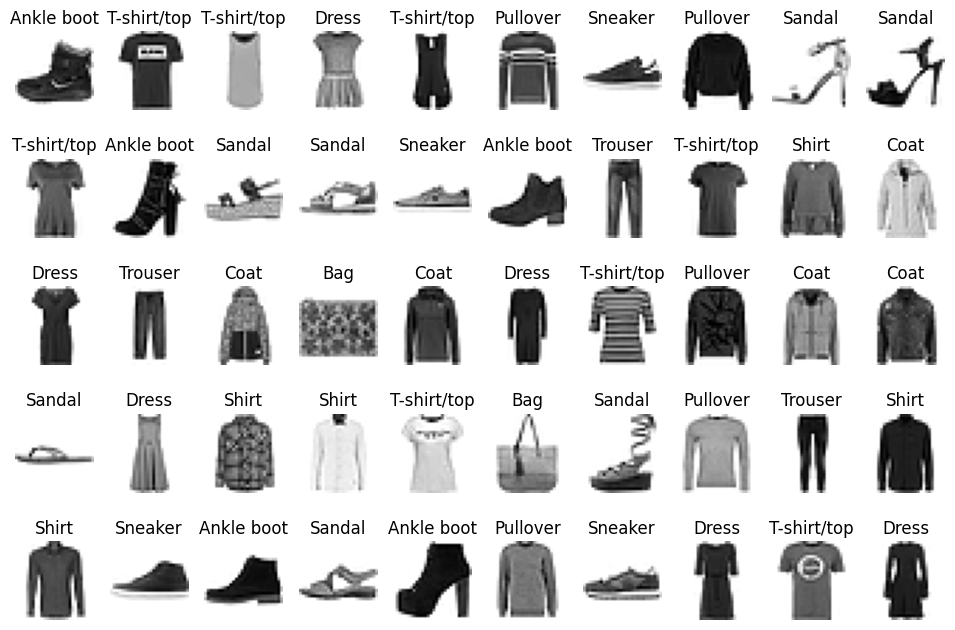

In [3]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

fig = plt.figure(figsize=(12, 8))
for i in range(50):
    a = fig.add_subplot(5, 10, i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray_r')
    plt.title(labels[y_train[i]])

plt.show()

In [4]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
num_labels = len(np.unique(y_train))

print(y_train[:4])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:4])


[9 0 0 3]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


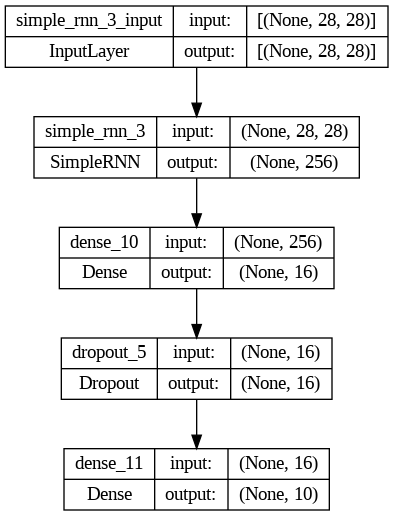

In [22]:
model = keras.Sequential([
    layers.SimpleRNN(units=256, input_shape=(28, 28)),
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=10, activation='softmax')
])
plot_model(model, show_shapes=True)

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 17s 34ms/step - loss: 0.9418 - accuracy: 0.6803
Epoch 2/30
469/469 [==============================] - 16s 34ms/step - loss: 0.6716 - accuracy: 0.7678
Epoch 3/30
469/469 [==============================] - 17s 35ms/step - loss: 0.6114 - accuracy: 0.7907
Epoch 4/30
469/469 [==============================] - 16s 34ms/step - loss: 0.5613 - accuracy: 0.8061
Epoch 5/30
469/469 [==============================] - 16s 34ms/step - loss: 0.5476 - accuracy: 0.8126
Epoch 6/30
469/469 [==============================] - 17s 36ms/step - loss: 0.5315 - accuracy: 0.8153
Epoch 7/30
469/469 [==============================] - 16s 34ms/step - loss: 0.5038 - accuracy: 0.8260
Epoch 8/30
469/469 [==============================] - 17s 36ms/step - loss: 0.5092 - accuracy: 0.8262
Epoch 9/30
469/469 [==============================] - 16s 35ms/step - loss: 0.4870 - accuracy: 0.8291
Epoch 10/30
469/469 [==============================] - 16s 34ms/step - loss: 0.475

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5200 - accuracy: 0.8147


[0.5199589133262634, 0.8147000074386597]

In [19]:
model2 = keras.Sequential([
    layers.GRU(units=256, input_shape=(28, 28)),
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=10, activation='softmax')
])
plot_model(model2, show_shapes=True)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 45s 92ms/step - loss: 0.9509 - accuracy: 0.6492
Epoch 2/20
469/469 [==============================] - 44s 93ms/step - loss: 0.5937 - accuracy: 0.7916
Epoch 3/20
469/469 [==============================] - 44s 93ms/step - loss: 0.5138 - accuracy: 0.8196
Epoch 4/20
469/469 [==============================] - 44s 94ms/step - loss: 0.4614 - accuracy: 0.8367
Epoch 5/20
469/469 [==============================] - 43s 93ms/step - loss: 0.4332 - accuracy: 0.8463
Epoch 6/20
469/469 [==============================] - 44s 93ms/step - loss: 0.4128 - accuracy: 0.8547
Epoch 7/20
469/469 [==============================] - 44s 94ms/step - loss: 0.3913 - accuracy: 0.8619
Epoch 8/20
469/469 [==============================] - 53s 113ms/step - loss: 0.3715 - accuracy: 0.8676
Epoch 9/20
469/469 [==============================] - 46s 97ms/step - loss: 0.3506 - accuracy: 0.8758
Epoch 10/20
469/469 [==============================] - 48s 102ms/step - loss: 0.3

In [20]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3070 - accuracy: 0.9008


[0.30700287222862244, 0.9007999897003174]

In [21]:
model3 = keras.Sequential([
    layers.LSTM(units=256, input_shape=(28, 28)),
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=10, activation='softmax')
])
plot_model(model3, show_shapes=True)
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=128)
model3.evaluate(x_test, y_test)

Epoch 1/20
469/469 [==============================] - 67s 139ms/step - loss: 0.9839 - accuracy: 0.6472
Epoch 2/20
469/469 [==============================] - 63s 134ms/step - loss: 0.5889 - accuracy: 0.7906
Epoch 3/20
469/469 [==============================] - 63s 135ms/step - loss: 0.5089 - accuracy: 0.8207
Epoch 4/20
469/469 [==============================] - 64s 136ms/step - loss: 0.4664 - accuracy: 0.8356
Epoch 5/20
469/469 [==============================] - 63s 135ms/step - loss: 0.4314 - accuracy: 0.8497
Epoch 6/20
469/469 [==============================] - 63s 134ms/step - loss: 0.4089 - accuracy: 0.8569
Epoch 7/20
469/469 [==============================] - 64s 136ms/step - loss: 0.3844 - accuracy: 0.8663
Epoch 8/20
469/469 [==============================] - 63s 135ms/step - loss: 0.3692 - accuracy: 0.8712
Epoch 9/20
469/469 [==============================] - 64s 136ms/step - loss: 0.3492 - accuracy: 0.8773
Epoch 10/20
469/469 [==============================] - 63s 134ms/step - l

[0.3059190809726715, 0.8963000178337097]

<ipython-input-25-dd076327b8f8>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


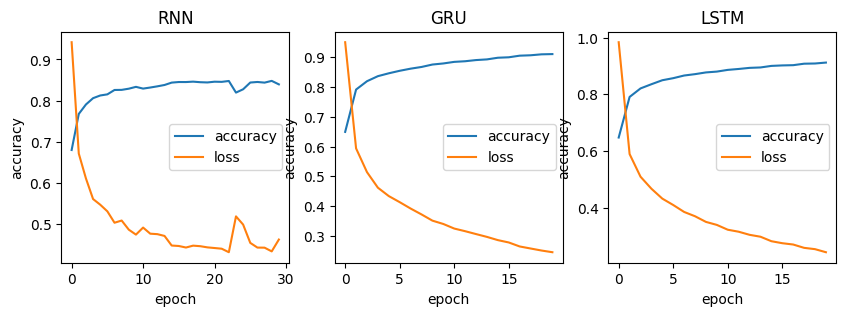

In [25]:
plt.subplots(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('RNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.subplot(1, 3, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('GRU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.subplot(1, 3, 3)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()